<a href="https://colab.research.google.com/github/ella-abung/Hello-World/blob/main/pump_it_up_Aug_19_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Pump it Up: Data Mining the Water Table

https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/



Importing Libraries

In [ ]:
import numpy as np #for linear algebra
import pandas as pd #for data processing

#for data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#we would use models from the scikit learn library to develop our machine learning models

#Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc

#Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import string

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# New section

Reading in Data

In [ ]:
X_train = pd.read_csv('/content/Trainig set values.csv').set_index('id')
y_train = pd.read_csv('/content/Training set labels.csv').set_index('id')

X_test = pd.read_csv('/content/Test set values.csv').set_index('id')
submission = pd.read_csv('/content/SubmissionFormat.csv').set_index('id')

Exploratory Data Analysis (EDA)

In [ ]:
X_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
X_train['waterpoint_type'].unique()

array(['communal standpipe', 'communal standpipe multiple', 'hand pump',
       'other', 'improved spring', 'cattle trough', 'dam'], dtype=object)

In [ ]:
X_train['source_class'].unique()

array(['groundwater', 'surface', 'unknown'], dtype=object)

In [ ]:
X_train['source'].unique()

array(['spring', 'rainwater harvesting', 'dam', 'machine dbh', 'other',
       'shallow well', 'river', 'hand dtw', 'lake', 'unknown'],
      dtype=object)

In [ ]:
X_train['quantity'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [ ]:
X_train['construction_year'].unique()

array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970,
       1995, 2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990,
       1982, 1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994,
       1968, 1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965])

In [ ]:
X_train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [ ]:
X_train['date_recorded'] = pd.to_datetime(X_train['date_recorded'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   amount_tsh             59400 non-null  float64       
 1   date_recorded          59400 non-null  datetime64[ns]
 2   funder                 55765 non-null  object        
 3   gps_height             59400 non-null  int64         
 4   installer              55745 non-null  object        
 5   longitude              59400 non-null  float64       
 6   latitude               59400 non-null  float64       
 7   wpt_name               59400 non-null  object        
 8   num_private            59400 non-null  int64         
 9   basin                  59400 non-null  object        
 10  subvillage             59029 non-null  object        
 11  region                 59400 non-null  object        
 12  region_code            59400 non-null  int64         
 1

Our training set has 59,400 entries and 38 features, this does not include the targer variable or the label (status_group). They are datetime64[ns](1) that is 1 datetime feature, float64(3) three floats, int64(6), six integers and twenty nine objects, object(29).

Missing Values

In [ ]:
X_train['funder'].isnull().sum()/len(X_train)*100

6.11952861952862

In [ ]:
X_train['installer'].isnull().sum()/len(X_train)*100

6.153198653198653

In [ ]:
X_train['subvillage'].isnull().sum()/len(X_train)*100

0.6245791245791246

In [ ]:
X_train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
X_train['funder'].nunique()

1897

#Description of the Features
amount_tsh - Total static head (amount water available to waterpoint) (Not sure)

date_recorded - The date the row was entered (Not sure)

funder - Who funded the well. This is a categorical feature with 1897 unique values (Might affect target variable)

gps_height - Altitude of the well (Might affect target variable)

installer - Organization that installed the well, This is a categorical feature with 2145 unique values (might affect target variable)

longitude - GPS coordinate (might affect)
latitude - GPS coordinate (might affect)

wpt_name - Name of the waterpoint if there is one (might not affect)
num_private -

basin - Geographic water basin, his is a categorical feature with 9 unique values (might affect)

subvillage - Geographic location (might affect)

region - Geographic location (might affect)

region_code - Geographic location (coded) (might not affect)

district_code - Geographic location (coded) (might not affect)

lga - Geographic location (might affect)

ward - Geographic location (might affect)

population - Population around the well (might affect)

public_meeting - True/False (might affect)

recorded_by - Group entering this row of data (might not affect)

scheme_management - Who operates the waterpoint (might affect)

scheme_name - Who operates the waterpoint (might not affect)

permit - If the waterpoint is permitted (might affect)

construction_year - Year the waterpoint was constructed (would affect)

extraction_type - The kind of extraction the waterpoint uses (might affect)

extraction_type_group - The kind of extraction the waterpoint uses (might not affect)

extraction_type_class - The kind of extraction the waterpoint uses (might not affect)

management - How the waterpoint is managed (would affect)

management_group - How the waterpoint is managed (would affect)

payment - What the water costs (might affect)

payment_type - What the water costs (might affect)

water_quality - The quality of the water (might affect)

quality_group - The quality of the water (might affect)

quantity - The quantity of water (might affect)

quantity_group - The quantity of water (might affect)

source - The source of the water (might affect)

source_type - The source of the water (might affect)

source_class - The source of the water (might affect)

waterpoint_type - The kind of waterpoint (might affect)

waterpoint_type_group - The kind of waterpoint (might affect)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 50785 to 68707
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   date_recorded          14850 non-null  object 
 2   funder                 13981 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  object 
 8   num_private            14850 non-null  int64  
 9   basin                  14850 non-null  object 
 10  subvillage             14751 non-null  object 
 11  region                 14850 non-null  object 
 12  region_code            14850 non-null  int64  
 13  district_code          14850 non-null  int64  
 14  lga                    14850 non-null  object 
 15

Some Plots

In [ ]:
y_train.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [ ]:
y_train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8)) # 1 row , 2 columns subplots 
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Survived') 
ax[0].set_ylabel('')

sns.countplot('Survived',data=df_train,ax=ax[1])

ax[1].set_title('Survived') # ax[0] & ax[1] are different axis for different plots.

plt.show()

ValueError: ignored

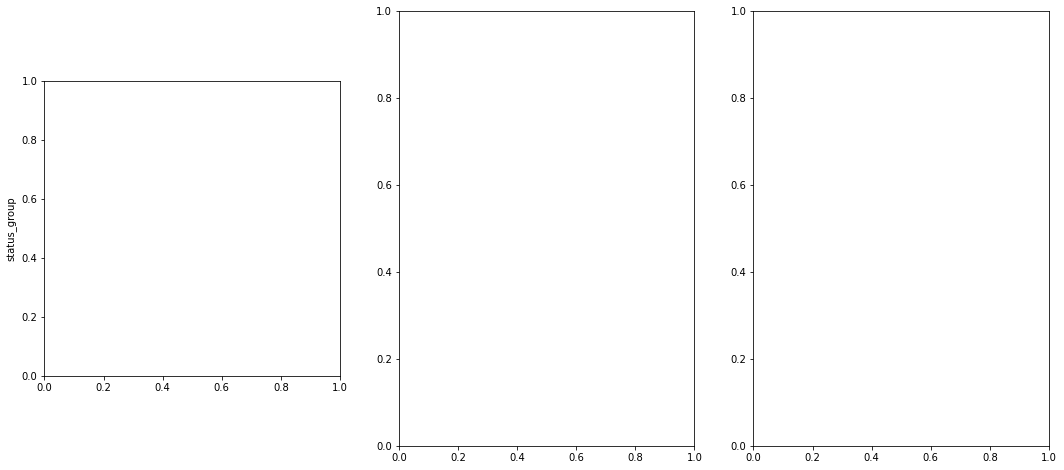

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (18,8)) #1 row and 3 columns subplots
y_train['status_group'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%', ax=ax[0], shadow=True)
ax[0].set_title('status_group')
ax[0].set_ylabel('')

sns.countplot('status_group', data=y_train, ax=ax[1])

ax[1].set_title('status_group')

plt.show()


In [ ]:
import folium

In [ ]:
center = X_train[['latitude', 'longitude']].mean()

center

latitude     -5.706033
longitude    34.077427
dtype: float64

In [ ]:
colors = {'functional': 'blue', 'non functional': 'gray', 'functional needs repair': 'red'}

m = folium.Map(location=center, zoom_start=6)

for pump in X_train.sample(200).itertuples():
    #folium.Marker(location=[pump.latitude, pump.longitude], 
    #             icon=folium.Icon(color=colors[y_train.loc[pump.Index, 'status_group']], icon='none')).add_to(m)
    folium.CircleMarker(location=[pump.latitude, pump.longitude], radius = 3, 
                        color=colors[y_train.loc[pump.Index, 'status_group']]).add_to(m)
m

In [ ]:
import matplotlib.pyplot as plt

from ipywidgets import widgets

def pump_plot(column):
    plt.hist(X_train[column], bins=100)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Number')
    
dropdown_values = sorted([f"{c}" for c in X_train.columns])
widgets.interact(pump_plot, column=dropdown_values);

interactive(children=(Dropdown(description='column', options=('amount_tsh', 'basin', 'construction_year', 'dat…

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

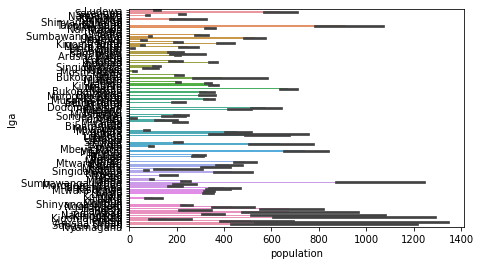

In [ ]:
sns.barplot(x='population', y='lga',hue='Sex',data=X_train)

ValueError: ignored

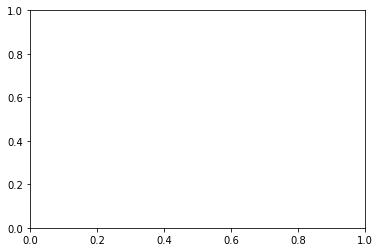

In [ ]:
plt.scatter(X_train['population'], one_hot_y)

In [ ]:
pipe = Pipeline([
    ('features', ColumnTransformer([
        ('keep', 'passthrough', ['amount_tsh', 'latitude', 'longitude', 'construction_year' ])
    ])),
    ('classifier', GridSearchCV(RandomForestClassifier(n_estimators=50, random_state=117),
                               param_grid={'max_depth': [10, 20, 30, 40]}, cv=5))
])

In [ ]:
pipe.fit(X_train, y_train.values.reshape(-1))

Pipeline(memory=None,
         steps=[('features',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('keep', 'passthrough',
                                                  ['amount_tsh', 'latitude',
                                                   'longitude',
                                                   'construction_year'])],
                                   verbose=False)),
                ('classifier',
                 GridSearchCV(cv=5, error_score=nan,
                              estimator=RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha...
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
       

In [ ]:
pipe.score(X_train, y_train.values.reshape(-1))

0.7294444444444445

In [ ]:
pipe.named_steps['classifier'].best_params_

{'max_depth': 20}

In [ ]:
#To make our prediction
submission['status_group'] = pipe.predict(X_test)

In [ ]:
#To export our submission
date_today = pd.datetime.now().strftime("%m-%d-%Y-%H:%M")
submission.to_csv(f'submission-{date_today}.csv')

Below is another way to export your data

In [ ]:
#first_submission = pd.DataFrame(pipe.predict(X_test), index = X_test.index, columns = ['status_group'])

In [ ]:
#first_submission.head()

In [ ]:
#from google.colab import files
#dd_submission1 = first_submission.to_csv('ddsubmission.csv')
#files.download('ddsubmission.csv')